## Biology and Learning

The basic idea of learning is that **good behavior should be rewarded, bad behavior punished**. This can improve system fitness.

According to this feature, the training mechanisms could be

1.Behavioral modification of individuals.

2.Successful behavior is rewarded.

<div style = "text-align:center">
<img src="Pictures\neuron.png", title = "Neuron", align="middle"/>
<!--<B>FIGURE 1: The illustration of a neuron</B>-->
</div>

**Soma** or cell body is equivalent to the CPU of computer, it can combine signals.

**Dendrite** is the input bus of the computer, it combines the inputs from other nerve cells.

**Synapse** seems like the interface of hardware, storing parameters between neurons.

**Axon**, the output bus, will transport the activation signal to neurons at different locations.

Then we take an analog of the neuron

<div style = "text-align:center">
<img src="Pictures\perceptron.png", title = "Perceptron", width = "600", height = "300"/>
<!--<caption><B>FIGURE 2: The perceptron model</B></caption>-->
</div>

Learning is choosing the $\mathbf{w}$ that makes the output agree on the labels.

## Perceptron Learning Algorithm

Start from some $\mathbf{w}_0$, and correct its mistakes on dataset $\mathcal{D}$

For $t=0,1,\dots$

Find a mistake of $\mathbf{w}_t$ called $\mathbf{x}_{n(t)},y_{n(t)}$ that

$$\text{sign}\left(\mathbf{w}_t^T\mathbf{x}_{n(t)}\right)\not=y_{n(t)}$$

Then correct the mistake by

$$\mathbf{w}_{t+1}\leftarrow\mathbf{w}_t+y_{n(t)}\mathbf{x}_{n(t)}$$

Until no more mistakes return $\mathbf{w}_{PLA}$

Assume linear separate $\mathcal{D}$, why PLA always halt?

We have perfect $\color{red}{\mathbf{w}_f}$ that every $\color{blue}{\mathbf{x}_n}$ is correct

$$\color{purple}{y_{n(t)}\mathbf{w}_f^T\mathbf{x}_{n(t)}}\color{blue}{\geq\min_ny_n\mathbf{w}_f^T\mathbf{x}_{n}}\color{red}{>0}$$

\begin{align*}
\mathbf{w}_f^T\mathbf{w}_{t+1}&=\mathbf{w}_f^T\left(\mathbf{w}_{t}+\color{purple}{y_{n(t)}\mathbf{x}_{n(t)}}\right)\\
&\color{blue}{\geq} \mathbf{w}_f^T\mathbf{w}_{t}\color{blue}{+\min_ny_n\mathbf{w}_f^T\mathbf{x}_{n}}\\
&\color{red}{>}\mathbf{w}_f^T\mathbf{w}_{t}\color{red}{+0}
\end{align*}

According to above, the dot product of $\mathbf{w}_f$ and $\mathbf{w}_{t+1}$ increases along with the iteration. And 

\begin{align*}
\|\mathbf{w}_{t+1}\|^2&=\|\mathbf{w}_t+y_{n(t)}\mathbf{x}_{n(t)}\|^2\\
&=\|\mathbf{w}_t\|^2+\color{blue}{2y_{n(t)}\mathbf{w}_{t}^T\mathbf{x}_{n(t)}}+\|y_{n(t)}\mathbf{x}_{n(t)}\|^2\\
&\color{blue}{\leq}\|\mathbf{w}_{t}\|^2+\color{blue}{0}+\color{red}{\|y_{n(t)}\mathbf{x}_{n(t)}\|^2}\\
&\color{red}{\leq}\|\mathbf{w}_t\|^2+\color{red}{\max_n\|\color{gray}{y_n}\mathbf{x}_n\|^2}
\end{align*}

$$\cos\theta=\frac{\mathbf{w}_{f}^T\cdot\mathbf{w}_{T}}{\|\mathbf{w}_{f}\|\|\mathbf{w}_{T}\|}\geq\frac{\mathbf{w}_{f}^T\mathbf{w}_{0 }+T\min_ny_n\mathbf{w}_{f}^Tx_n}{\|\mathbf{w}_{f}\|\sqrt{\|\mathbf{w}_{0}\|^2+T\max_n\|x_n\|^2}}$$

It says that after $T$ times corrects, we have $\sup{\theta}$, if $\mathbf{w}_{0}=\mathbf{0}$, the biggest $T$ satisfies

$$1\geq \cos\theta\geq \frac{\sqrt{T}\rho}{R}$$

Where $$\rho=\min_ny_n\frac{\mathbf{w}_{f}^T}{\|\mathbf{w}_{f}\|}\mathbf{x}_n\qquad\qquad R=\max_n\|\mathbf{x}_n\|$$

i.e.

$$T\leq\frac{R^2}{\rho^2}$$

In [1]:
from __future__ import division
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
class Perceptron(object):
    def __init__(self, dimension):
        self.dimension = dimension
        self.w=np.zeros(self.dimension + 1)
        self.counter = 0
    def train(self, X, y, eta = 1.0):
        indicator = True
        X=np.array([list(x) + [1] for x in X])
        while indicator:
            indicator = False
            for i in range(len(X)):
                if np.sign(np.dot(X[i], self.w)) != y[i]:
                    self.w = self.w + eta * X[i] * y[i]
                    indicator = True
                    break
            self.counter += 1
    def predict(self,x):
        x=list(x) + [1]
        return np.sign(np.dot(x, self.w))

In [3]:
X = np.loadtxt("Datasets\X.dat").T
Y = np.loadtxt("Datasets\Y.dat")

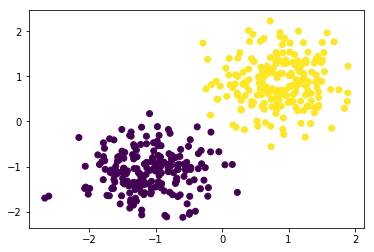

In [4]:
plt.scatter(X[:,0], X[:, 1],c=Y)

In [5]:
perceptron=Perceptron(2)
perceptron.train(X,Y)

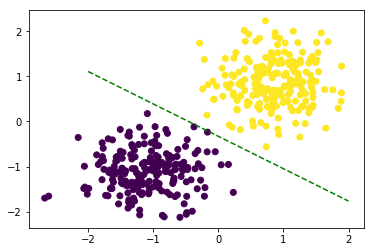

In [6]:
x_coordinate = np.linspace(-2,2,100)
y_coordinate = (-perceptron.w[0] * x_coordinate - perceptron.w[2]) / perceptron.w[1]
plt.scatter(X[:,0], X[:, 1],c=Y)
plt.plot(x_coordinate, y_coordinate, "g--")

In [7]:
perceptron.counter

16

## Kernel Perceptron

All we talk about is when points are linear separatable, how about the non-linear features?

The heuristic is that map data into feature space $x\rightarrow \phi(x)$, then solve the problem in this space. Therefore, the perceptron on features can be illustrated as

Repeat pick $(x_i,y_i)$ from data, set $\mathbf{w}_{t+1}=\mathbf{w}_t+\phi(x_i)y_i$ until $y_i\langle\mathbf{w},\phi(x_i)\rangle>0$ for all $i$. Finally,
the weight vector is

$$\mathbf{w}=\sum_iy_i\phi(x_i)$$

and the decision function is

$$f(x)=\langle \mathbf{w} ,\phi(x)\rangle=\sum_iy_i\langle \phi(x_i),\phi(x)\rangle$$

However, the problems of perceptron on features are:

1.Need domain expert.

2.Often expensive to compute: Extracting features can sometimes be very costly. e.g. Second order features in $1000$ dimensions lead to $5\times10^5$ numbers.

3.Difficult to transfer engineering knowledge.

**Do not compute the features, try to compute dot products implicitly.**

\begin{definition}
A kernel function $k \colon \mathcal{X} \times\mathcal{X} \to \mathbb{R}$ is a symmetric function in its arguments for which the following property holds

$$k(x,x^\prime)=\langle \phi(x),\phi(x')\rangle$$

\end{definition}

Note that kernel function is often smooth and symmetric.

Is there always a $\phi$ such that $k$ really is a dot product. (i.e. for all $x,x'$, can we construct $\phi$ that $k(x,x')=\phi_i(x)\phi_i(x')$ )?

\begin{theorem}[Mercer]

For any symmetric function $k \colon \mathcal{X} \times\mathcal{X} \to \mathbb{R}$ which is square integrable in $\mathcal{X} \times\mathcal{X}$ and which satisfies

$$\int_{\mathcal{X} \times\mathcal{X}}k(x,x^\prime)f(x)f(x')\,dxdx'\geq 0 \text{ for all } f\in L_2(\mathcal{X}) $$

there exist $\phi_i\colon\mathcal{X}\to \mathbb{R}$ and numbers $\lambda_i\geq 0$ where 

$$k(x,x')=\sum_i\lambda_i\phi_i(x)\phi_i(x')\text{ for all } x,x'\in \mathcal{X}$$

\end{theorem}

In other words, any positive semi-definite function can be kernel function. 

**Check Mercer's condition: compute the Fourier transform of the kernel and check that it is nonnegative.**

Usually, we can choose $\phi(x)$ that makes $k(x,x^\prime)$ much simpler than $\phi(x)$. e.g.

$$\phi(x)=\big(x_1^2,\sqrt{2}x_1x_2,x_2^2\big)$$

and

$$\langle \phi(x),\phi(x')\rangle=\big\langle\big(x_1^2,\sqrt{2}x_1x_2,x_2^2\big),\big(x_1^{\prime2},\sqrt{2}x_1^{\prime}x_2^{\prime},x_2^{\prime2}\big)\big\rangle=\langle x,x'\rangle^2$$

Because $\mathbf{w}=\sum_ty_{t(i)}\phi(x_t(i))=\sum_i\alpha_iy_i\phi(x_i)$, where $\alpha_i$ is the number of errors on instance $i$, prediction formula is

$$f(x)=\text{sign}(\mathbf{w}^Tx)=\text{sign}\big(\sum_i\alpha_iy_ix_i\big)^Tx=\text{sign}\sum_i\alpha_iy_i(x_i^T\cdot x)=\text{sign}\sum_i\alpha_iy_ik(x_i,x)$$

And the **Kernel Perceptron Algorithm** is

1.Initialize $\mathbf{\alpha}=\mathbf{0}$.

while misclassification:

   2.Repeat $\alpha_i=\alpha_i+1$ until $y_if(x_i)>0, \forall i$.
   
end


Therefore, 

$$f(x)=\text{sign}\sum_i\alpha_iy_ik(x_i,x)$$

In fact, kernel function is a similarity measure. Consider any two instances $x_i,x_j$, we study **kernel matrix** $K$, first define the distance in feature space

\begin{align*}
d(x_i,x_j)&=\|\phi(x_i)-\phi(x_j)\|\\
&=\langle\phi(x_i),\phi(x_i)\rangle-2\langle\phi(x_i),\phi(x_j)\rangle+\langle\phi(x_j),\phi(x_j)\rangle\\
&=k(x_i,x_i)+k(x_j,x_j)-2k(x_i,x_j)
\end{align*}

The entry $K_{ij}$ is

$$K_{ij}=\langle\phi(x_i),\phi(x_j)\rangle=k(x_i,x_j)$$

which tell us the overlap between $\phi(x_i)$ and $\phi(x_j)$.

\begin{theorem}
$K$ is symmetric and positive semi-definite. In other words, $\alpha^TK\alpha\geq 0$ for all $\alpha\in\mathbb{R}^m$ and kernel matrix $K\in\mathbb{R}^{m\times m}$
\end{theorem}

\begin{proof}

\begin{align*}
\sum_{i,j}^m \alpha_i\alpha_jK_{ij}&=\sum_{i,j}^m \alpha_i\alpha_j\langle\phi(x_i),\phi(x_j)\rangle\\
&=\big\langle\sum_i^m\alpha_i\phi(x_i),\sum_j^m\alpha_j\phi(x_j)\big\rangle\\
&=\big\|\sum_i^m\alpha_i\phi(x_i)\big\|^2\geq 0
\end{align*}

\end{proof}

Some candidate kernel:

Linear:
$$ \langle x_i,x_j\rangle$$

Laplacian RBF:
$$\exp{(-\lambda\|x_i-x_j\|)}$$

Gaussian RBF: 
$$ \exp{(-\lambda\|x_i-x_j\|^2)}$$

Polynomial:
$$ \big(\langle x_i,x_j\rangle+c\big)^d,\text{ where }c\geq0,d\in \mathbb{N} $$

Conditional Expectation:

$$\mathbb{E}_c[p_i(x\mid c)p(x_j\mid c)]$$

In [8]:
class Kernel_Perceptron():
    def __init__(self, X, y):
        self.X = np.hstack((np.ones((len(X), 1)), X))
        self.y = y
    # Gaussian kernel
    def kernel(self, X_train, x_new):
        if X_train.ndim == 1 and x_new.ndim == 1:
            return np.exp(- np.linalg.norm(X_train - x_new) ** 2)
        elif (X_train.ndim == 1 and x_new.ndim > 1) or (X_train.ndim > 1 and x_new.ndim == 1):
            return np.exp(- np.linalg.norm(X_train - x_new, axis = 1) ** 2)
        elif X_train.ndim > 1 and x_new.ndim > 1:
            return np.exp(-np.linalg.norm(X_train[:, np.newaxis] - x_new[np.newaxis, :], axis = 2) ** 2)  
    def train(self, stop):
        indicator = True
        self.alpha=np.zeros(len(self.y))
        j = 0
        while (indicator):
            indicator = False
            for i in range(len(self.X)):
                if self.y[i] * np.sum(self.alpha * self.y * self.kernel(self.X, self.X[i])) <= 0:
                    self.alpha[i] = self.alpha[i] + 1
                    indicator = True
                    break
            j = j + 1
            if j > stop:
                break
        print "After " + str(j) + " iterations " + "halts"
        return self.alpha
    def predict(self,x):
        x=np.hstack((np.ones((len(x), 1)), x))
        return np.sign(np.dot(self.alpha * self.y, self.kernel(self.X, x)))

In [9]:
X = np.random.randn(10,2)
y = np.ones(10)
y[5:9] = -1

In [10]:
def plot_2d_boundary(X, Y, predict_function, scale = 1, stride = 0.01, fig_size = (4, 3)):
    # X is a 2d array, covariates
    # Y is an 1d array, labels
    # predict_function maps an observation to a label
    # scale controls the boundary of the plot
    # stride is the step size along the axes
    # fig_size is the size of the figure
    x_min, x_max = X[:, 0].min() - scale, X[:, 0].max() + scale
    y_min, y_max = X[:, 1].min() - scale, X[:, 1].max() + scale
    # Produce the coordinates of the points will be predicted
    xx, yy = np.meshgrid(np.arange(x_min, x_max, stride), np.arange(y_min, y_max, stride))
    # Predict
    Z = predict_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize= fig_size)
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.rainbow_r)
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.rainbow_r)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

In [11]:
k = Kernel_Perceptron(X,y)
k.train(2000)

After 38 iterations halts


array([ 1.,  1.,  1.,  1., 15.,  7.,  1.,  0., 10.,  0.])

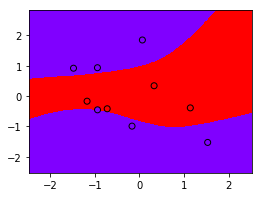

In [12]:
plot_2d_boundary(X, y, k.predict)